In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('twitter_training.csv.zip')

In [3]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
# adding headers
df.columns = ['Tweet ID', 'Entity', 'Sentiment', 'Tweet content']

In [5]:
df

,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
df.isnull().sum()

Tweet ID           0
Entity             0
Sentiment          0
Tweet content    686
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Tweet ID         0
Entity           0
Sentiment        0
Tweet content    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(2340)

In [10]:
df = df.drop_duplicates()

In [11]:
df

,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe()

,Tweet ID
count,71655.000000
mean,6436.493559
std,3742.287116
min,1.000000
25%,3199.000000
50%,6433.000000
75%,9604.000000
max,13200.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       71655 non-null  int64 
 1   Entity         71655 non-null  object
 2   Sentiment      71655 non-null  object
 3   Tweet content  71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


# Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x2418b473ce0>,
 [Text(0.6386766549365056, 0.8955959638358785, 'Negative'),
  Text(-1.0236676965331064, 0.4026219654646329, 'Positive'),
  Text(-0.33022623868953704, -1.0492619459796304, 'Neutral'),
  Text(0.9379704692071459, -0.574640234316504, 'Irrelevant')],
 [Text(0.3483690845108212, 0.4885068893650245, '30.3%'),
  Text(-0.5583641981089671, 0.21961198116252703, '27.5%'),
  Text(-0.18012340292156565, -0.5723246978070711, '24.7%'),
  Text(0.5116202559311704, -0.31344012780900216, '17.5%')])

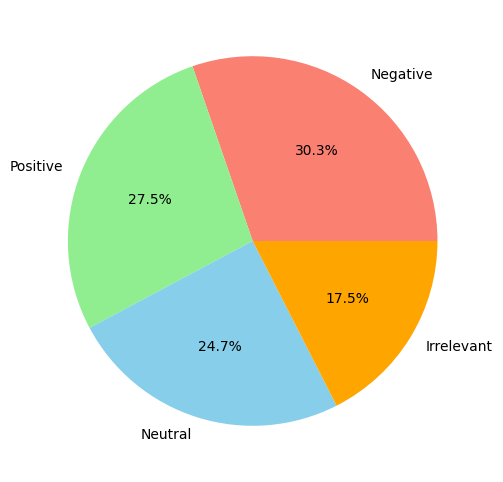

In [15]:
sentiment_counts = df['Sentiment'].value_counts()

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=[ 'salmon','lightgreen','skyblue','orange'])

Entity
TomClancysRainbowSix    2328
Verizon                 2319
MaddenNFL               2315
CallOfDuty              2314
Microsoft               2304
WorldOfCraft            2300
NBA2K                   2299
LeagueOfLegends         2296
TomClancysGhostRecon    2291
Facebook                2289
Name: count, dtype: int64

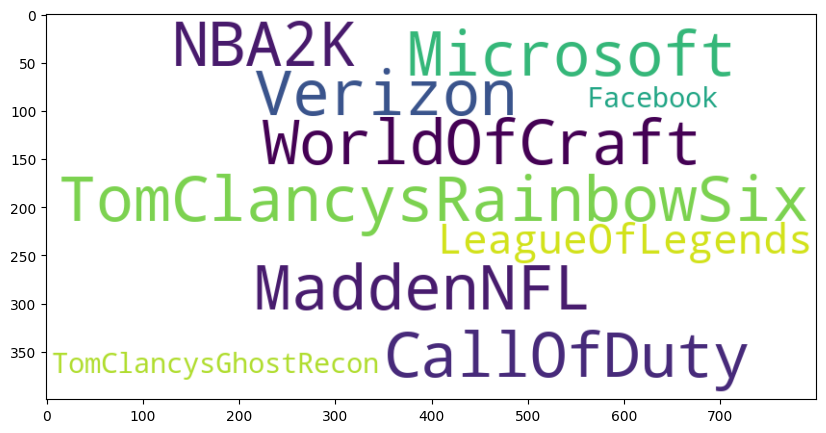

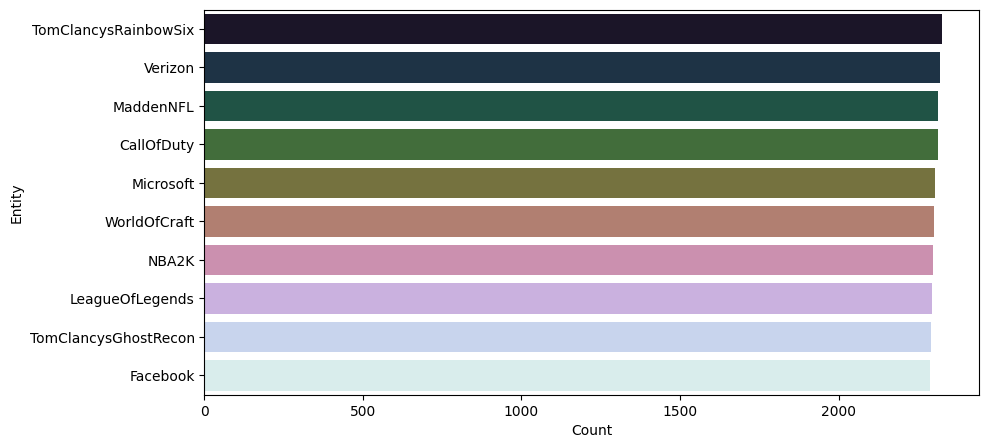

In [32]:
top_entities = df['Entity'].value_counts().nlargest(10)
entity_freq_dict = top_entities.to_dict()
    
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(entity_freq_dict)
    
    # Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')


top_entities_df = top_entities.reset_index()
top_entities_df.columns = ['Entity', 'Count']

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Entity', hue='Entity', data=top_entities_df, palette='cubehelix')

top_entities

In [17]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

<Axes: ylabel='Entity'>

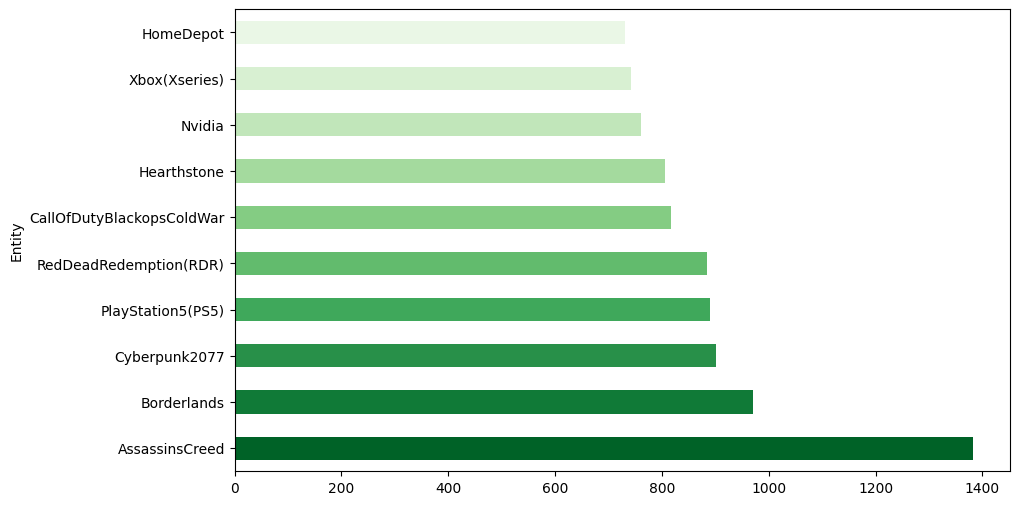

In [18]:
positive_tweets = df[df['Sentiment'] == 'Positive']

# Step 2: Count occurrences of each entity
entity_counts = positive_tweets['Entity'].value_counts()

# Step 3: Get top 10 entities
top_entities = entity_counts.nlargest(10)

colors = sns.color_palette("Greens_r", n_colors=len(top_entities))

# Step 4: Create bar plot
plt.figure(figsize=(10, 6))
top_entities.plot(kind='barh', color=colors)

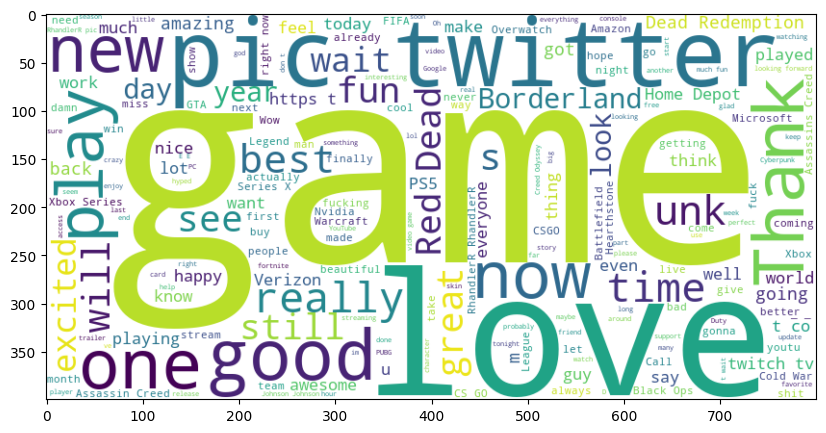

In [19]:
positive_tweets = df[df['Sentiment'] == 'Positive']

# Concatenate all tweet contents of positive tweets
text = ' '.join(positive_tweets['Tweet content'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

<Axes: ylabel='Entity'>

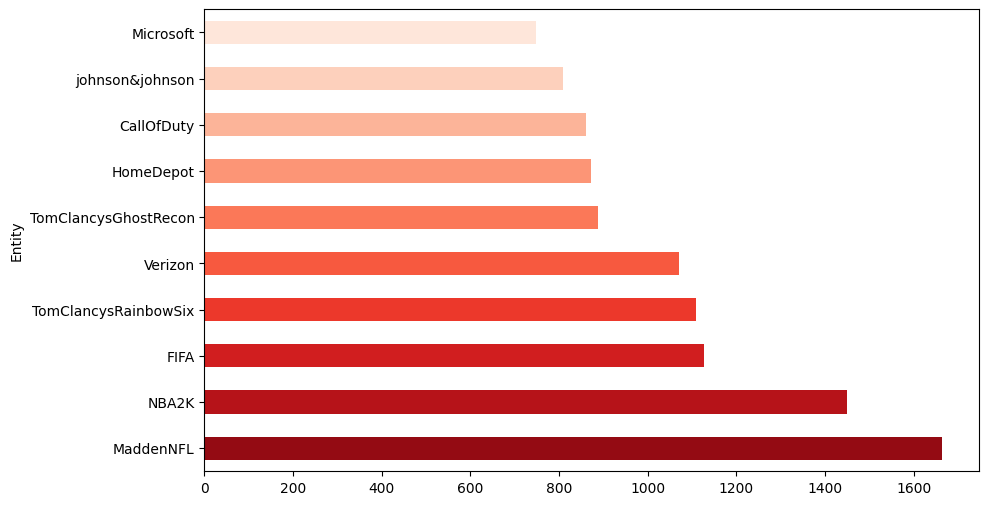

In [20]:
negative_tweets = df[df['Sentiment'] == 'Negative']

# Step 2: Count occurrences of each entity
entity_counts = negative_tweets['Entity'].value_counts()

# Step 3: Get top 10 entities
top_entities = entity_counts.nlargest(10)

colors = sns.color_palette("Reds_r", n_colors=len(top_entities))

# Step 4: Create bar plot
plt.figure(figsize=(10, 6))
top_entities.plot(kind='barh', color=colors)

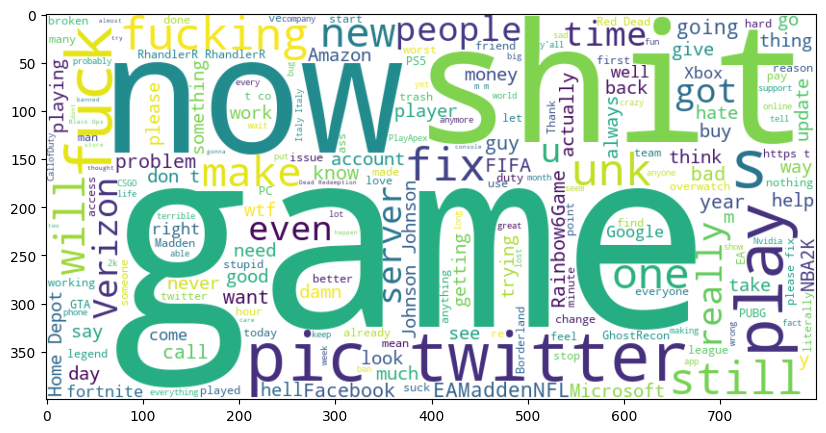

In [21]:
negative_tweets = df[df['Sentiment'] == 'Negative']

# Concatenate all tweet contents of positive tweets
text = ' '.join(negative_tweets['Tweet content'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

<Axes: ylabel='Entity'>

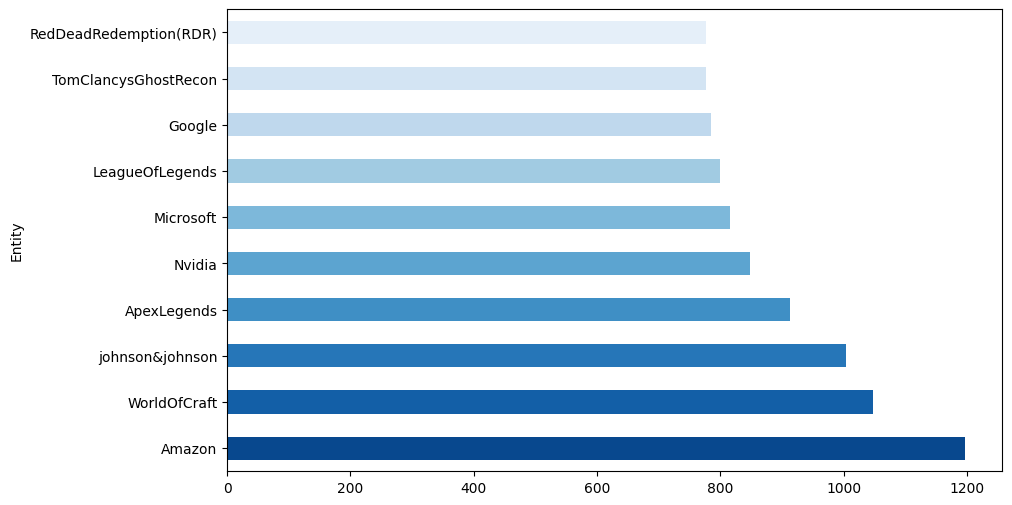

In [22]:
neutral_tweets = df[df['Sentiment'] == 'Neutral']

# Step 2: Count occurrences of each entity
entity_counts = neutral_tweets['Entity'].value_counts()

# Step 3: Get top 10 entities
top_entities = entity_counts.nlargest(10)

colors = sns.color_palette("Blues_r", n_colors=len(top_entities))

# Step 4: Create bar plot
plt.figure(figsize=(10, 6))
top_entities.plot(kind='barh', color=colors)

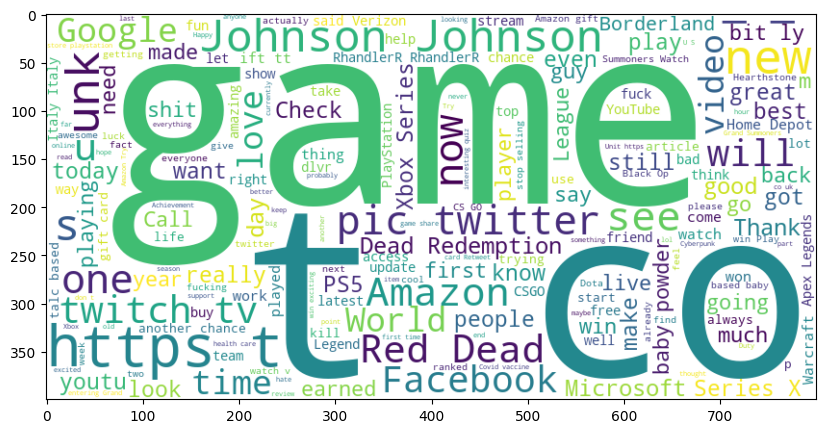

In [23]:
neutral_tweets = df[df['Sentiment'] == 'Neutral']

# Concatenate all tweet contents of positive tweets
text = ' '.join(neutral_tweets['Tweet content'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

<Axes: ylabel='Entity'>

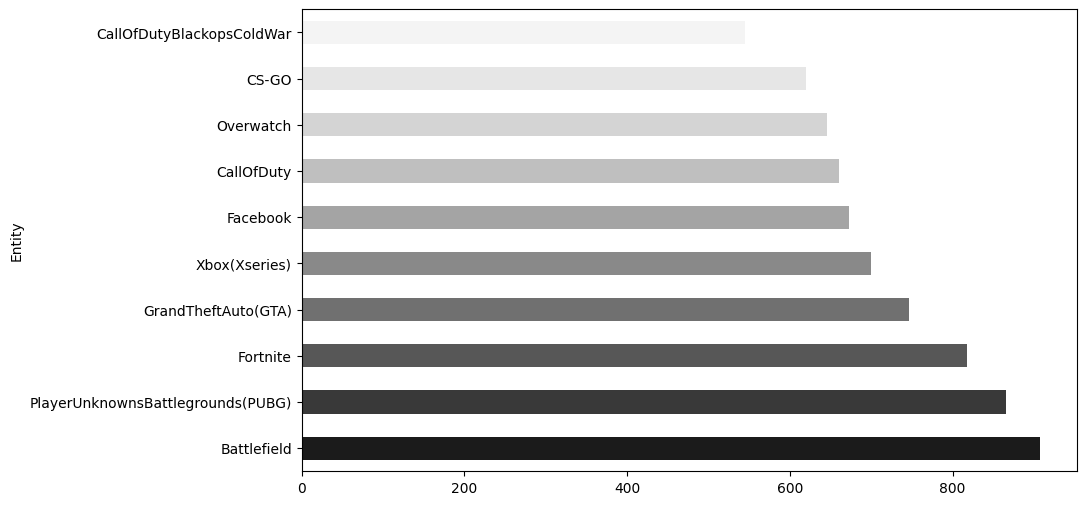

In [24]:
irrelevant_tweets = df[df['Sentiment'] == 'Irrelevant']

# Step 2: Count occurrences of each entity
entity_counts = irrelevant_tweets['Entity'].value_counts()

# Step 3: Get top 10 entities
top_entities = entity_counts.nlargest(10)

colors = sns.color_palette("Greys_r", n_colors=len(top_entities))

# Step 4: Create bar plot
plt.figure(figsize=(10, 6))
top_entities.plot(kind='barh', color=colors)

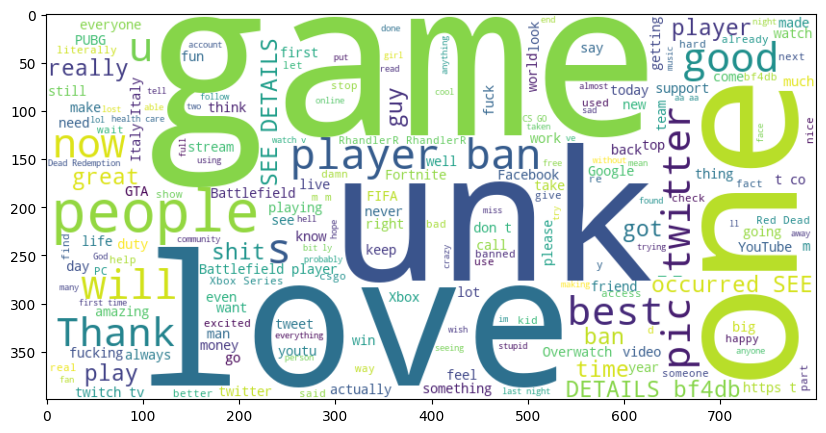

In [25]:
irrelevant_tweets = df[df['Sentiment'] == 'Irrelevant']

# Concatenate all tweet contents of positive tweets
text = ' '.join(irrelevant_tweets['Tweet content'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

Text(0.5, 1.0, 'sentiment distribution for the top 50 most frequent Tweet IDs')

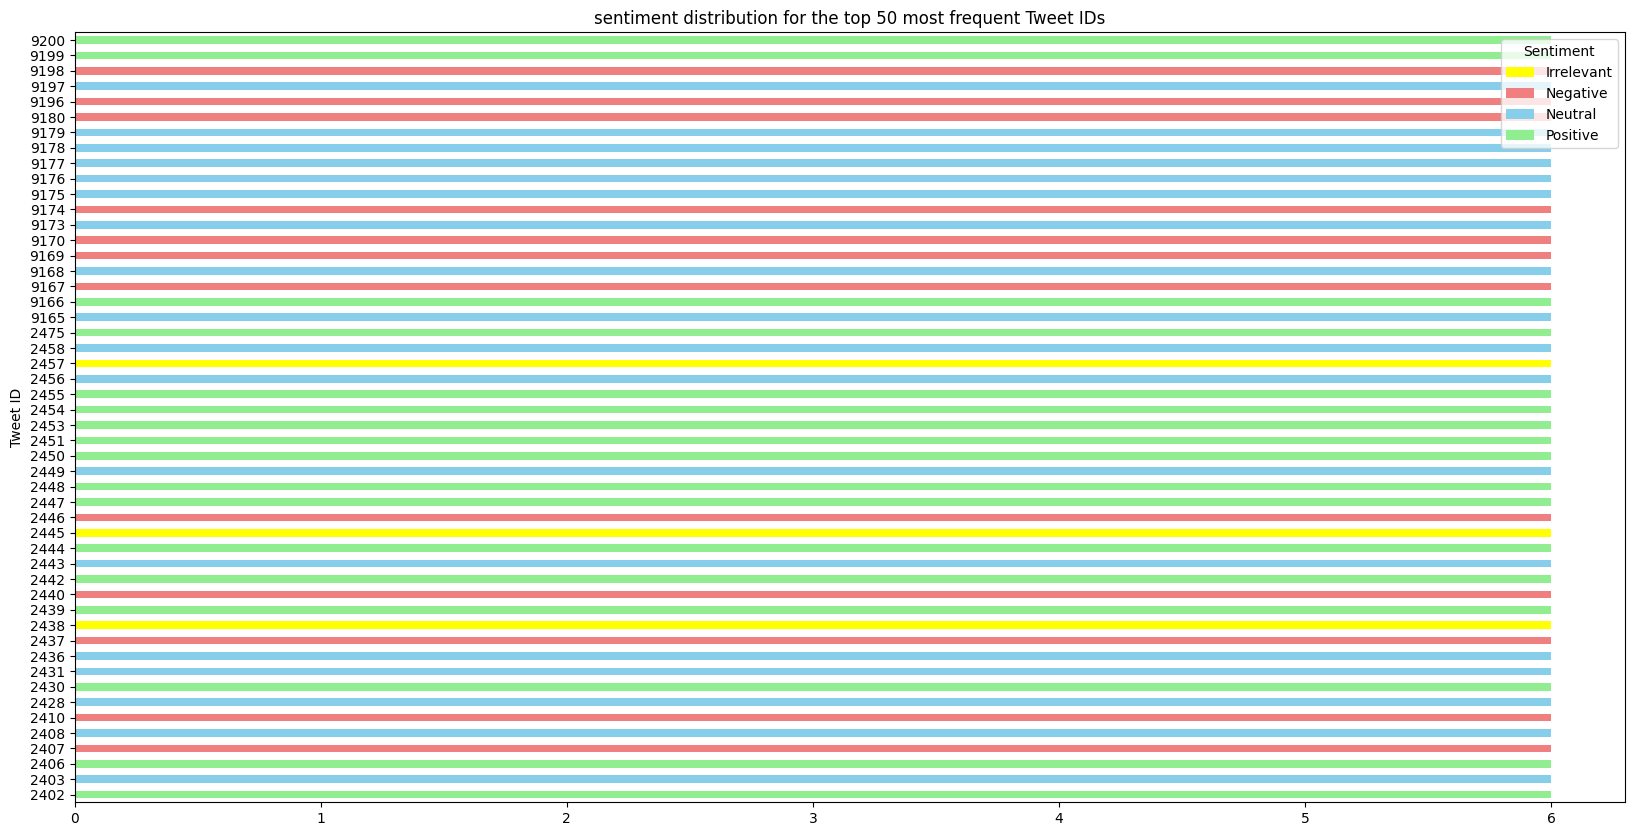

In [31]:
top_tweet_ids = df['Tweet ID'].value_counts().head(50).index

# Filter the dataset for only the top 10 most frequent Tweet IDs
top_tweets_df = df[df['Tweet ID'].isin(top_tweet_ids)]

# Sentiment Distribution by Tweet ID
sentiment_distribution = top_tweets_df.groupby(['Tweet ID', 'Sentiment']).size().unstack().fillna(0)

# Plot Sentiment Distribution for the top 10 most frequent Tweet IDs
sentiment_distribution.plot(kind='barh', stacked=True, figsize=(20, 10), color=['yellow', 'lightcoral', 'skyblue', 'lightgreen'])
plt.title('sentiment distribution for the top 50 most frequent Tweet IDs')

Text(0.5, 1.0, 'sentiment distribution for the top 50 most frequent Tweet IDs')

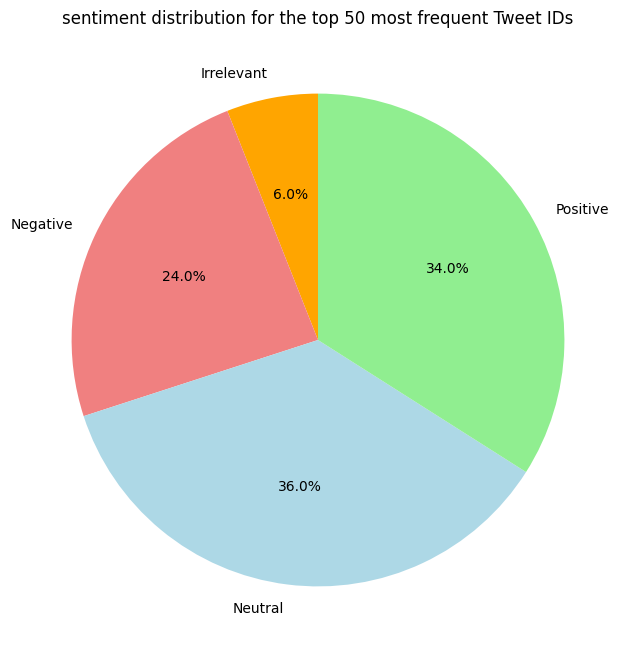

In [27]:
top_tweet_ids = df['Tweet ID'].value_counts().head(50).index

# Filter the dataset for only the top 10 most frequent Tweet IDs
top_tweets_df = df[df['Tweet ID'].isin(top_tweet_ids)]

# Sentiment Distribution by Tweet ID
sentiment_distribution = top_tweets_df.groupby('Sentiment').size()

# Calculate percentages
sentiment_percentage = (sentiment_distribution / sentiment_distribution.sum()) * 100

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_percentage, labels=sentiment_percentage.index, autopct='%1.1f%%',startangle=90, colors=['orange', 'lightcoral','lightblue','lightgreen'])
plt.title('sentiment distribution for the top 50 most frequent Tweet IDs')

Index(['TomClancysRainbowSix', 'Verizon', 'MaddenNFL', 'CallOfDuty',
       'Microsoft', 'WorldOfCraft', 'NBA2K', 'LeagueOfLegends',
       'TomClancysGhostRecon', 'Facebook'],
      dtype='object', name='Entity')

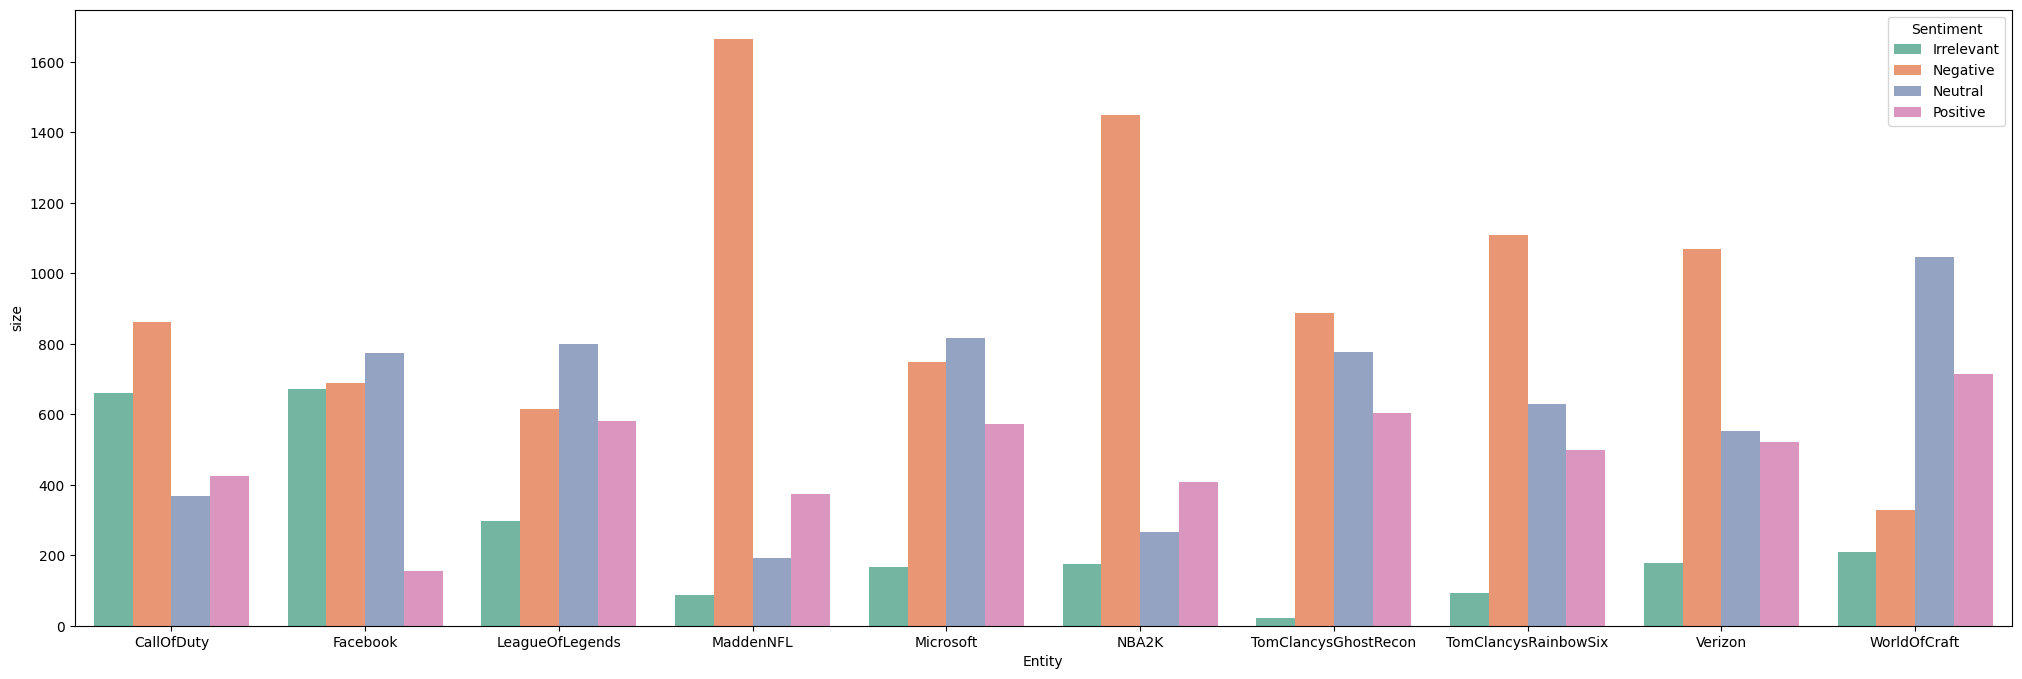

In [29]:

entity_sentiment_counts = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

entity_sentiment_counts = entity_sentiment_counts.reset_index()


top_entities = df['Entity'].value_counts().nlargest(10).index
filtered_entity_sentiment_counts = entity_sentiment_counts[entity_sentiment_counts['Entity'].isin(top_entities)]


plt.figure(figsize=(25, 8))
sns.barplot(x='Entity', y='size', hue='Sentiment', data=filtered_entity_sentiment_counts.melt(id_vars='Entity', var_name='Sentiment', value_name='size'), palette='Set2')
top_entities